### Libraries and functions

In [7]:
from __future__ import print_function
%matplotlib inline


import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
from ipywidgets import widgets
from IPython.display import display
import time

# LSST libraries, MAF metrics

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.db as db
from lsst.sims.featureScheduler import utils as schedUtils
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches

# Py file with functions
from functions import *

### Init data

In [11]:
# data.csv
# filter,fbs,realisation,ra,dec,noise,amp

mjd_array = []
opsim_array = []
import csv

with open('data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        fil = row['filter'];
        if not row['ra'] or len(row['ra']) == 0 :
            ra = 0;
        else:
            ra = int(row['ra'])
        if not row['dec'] or len(row['dec']) == 0 :
            dec = np.radians(-30);
        else:
            dec = np.radians(int(row['dec']));
        noise = float(row['noise']);
        amp = float(row['amp']);
        opsim = row['realisation'];
        dbfile = '/home/idies/workspace/lsst_cadence/FBS_' + row['fbs'] +'/' + opsim;
        opsdb = db.OpsimDatabase(dbfile)
        mjd =  getOpSimCadence(opsdb, opsim, ra, dec, fil);        
        mjd_array.append(mjd);
        opsim_array.append(opsim);
    
                



Querying database SummaryAllProps with constraint filter = 'g' for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 214351 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = 'r' for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 469008 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = 'u' for columns ['fieldRA', 'filter', 'fiveSigmaDepth', 'fieldDec', 'observationStartMJD']
Found 156714 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


### Get plots

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


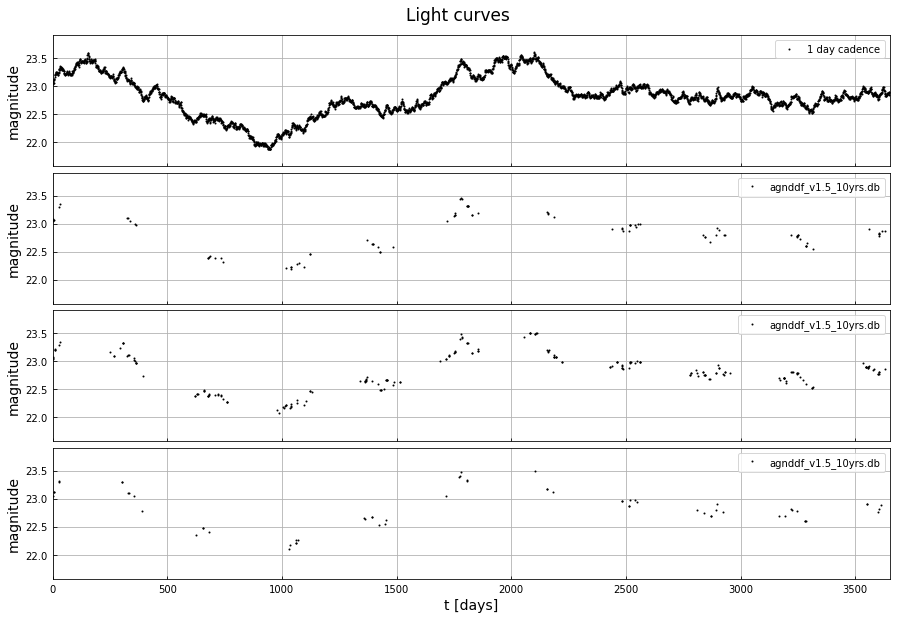

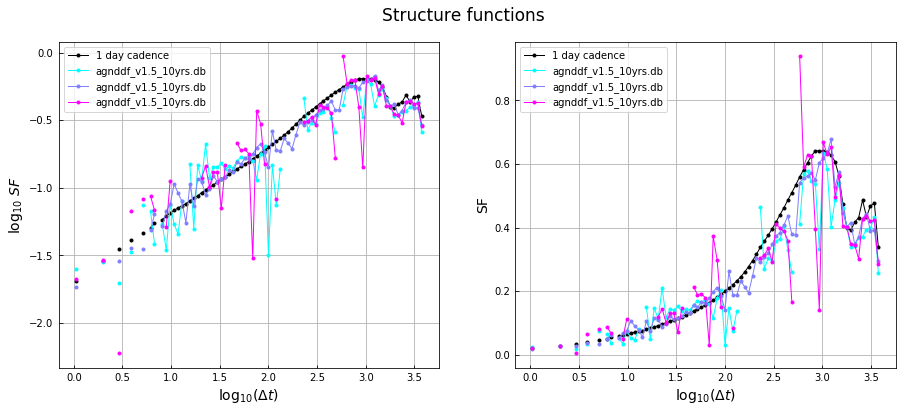

In [13]:
# Start plot
np.random.seed(0)
long=10*365 # survey duration in days
deltatc=1. # cadence for LC_conti()
LC_SF_viz(long, deltatc, mjd_array, opsim_array);